In [710]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [711]:
route_segments = pd.read_csv("DATA\\route_segements.csv")  # load 'route_segments' table

In [712]:
route_segments.info()  # 554 non-null rows (due to the fact that in starting table only items with segment_type equal to true have inserted order_id)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   segment_id          1000 non-null   int64  
 1   driver_id           1000 non-null   int64  
 2   segment_type        1000 non-null   object 
 3   order_id            446 non-null    float64
 4   segment_start_time  1000 non-null   object 
 5   segment_end_time    1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [713]:
route_segments = route_segments.drop(["segment_id", "driver_id"], axis=1)  # drop unnecessary columns

In [714]:
route_segments['order_id'] = route_segments['order_id'].fillna(method='ffill')

C:\Users\natal\AppData\Local\Temp\ipykernel_11068\205874335.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  route_segments['order_id'] = route_segments['order_id'].fillna(method='ffill')


In [715]:
drive_segments = route_segments[route_segments['segment_type'] == 'DRIVE']

In [716]:
drive_segments["order_id"] = drive_segments["order_id"].astype('int64')

C:\Users\natal\AppData\Local\Temp\ipykernel_11068\3521025331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drive_segments["order_id"] = drive_segments["order_id"].astype('int64')


In [717]:
drive_segments[["segment_start_time", "segment_end_time"]] = drive_segments[["segment_start_time", "segment_end_time"]].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')  #change to datatime format

C:\Users\natal\AppData\Local\Temp\ipykernel_11068\1077236035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drive_segments[["segment_start_time", "segment_end_time"]] = drive_segments[["segment_start_time", "segment_end_time"]].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')  #change to datatime format


In [718]:
drive_segments['delivery_length'] = (drive_segments['segment_end_time'] - drive_segments['segment_start_time']).dt.total_seconds() / 60  # count actual delivery length (in seconds)

C:\Users\natal\AppData\Local\Temp\ipykernel_11068\3692360258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drive_segments['delivery_length'] = (drive_segments['segment_end_time'] - drive_segments['segment_start_time']).dt.total_seconds() / 60  # count actual delivery length (in seconds)


In [719]:
drive_segments['delivery_length_rounded'] = drive_segments['delivery_length'].apply(lambda x: int(np.round(x)))  # the actual delivery length with 1 minute granularity

C:\Users\natal\AppData\Local\Temp\ipykernel_11068\2909304845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drive_segments['delivery_length_rounded'] = drive_segments['delivery_length'].apply(lambda x: int(np.round(x)))  # the actual delivery length with 1 minute granularity


In [720]:
drive_segments

,segment_type,order_id,segment_start_time,segment_end_time,delivery_length,delivery_length_rounded
1,DRIVE,1312,2024-02-09 14:51:20,2024-02-09 14:55:42,4.366667,4
3,DRIVE,1273,2024-02-24 09:15:02,2024-02-24 09:23:31,8.483333,8
5,DRIVE,1036,2024-02-24 20:17:02,2024-02-24 20:23:23,6.350000,6
8,DRIVE,2178,2024-02-23 09:28:27,2024-02-23 09:36:03,7.600000,8
11,DRIVE,331,2024-02-26 06:54:47,2024-02-26 07:00:21,5.566667,6
...,...,...,...,...,...,...
988,DRIVE,224,2024-02-12 08:08:54,2024-02-12 08:08:54,0.000000,0
991,DRIVE,1534,2024-02-18 07:58:18,2024-02-18 08:08:27,10.150000,10
994,DRIVE,198,2024-02-08 09:15:51,2024-02-08 09:26:57,11.100000,11
996,DRIVE,2097,2024-02-07 05:52:21,2024-02-07 05:55:40,3.316667,3


C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\natal\AppData\Local\Temp\ipykernel_11068\390317406.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

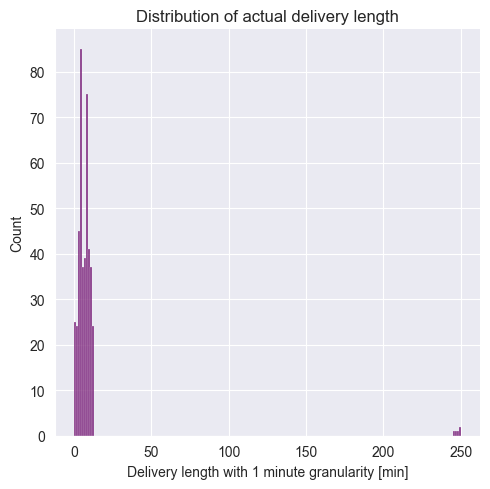

In [721]:
plt.figure(figsize=(8, 5), dpi=200)
sns.displot(
    data=drive_segments[drive_segments["delivery_length"]>=0], x="delivery_length_rounded", color='#660066'
)
plt.title("Distribution of actual delivery length")
plt.xlabel("Delivery length with 1 minute granularity [min]")
plt.tight_layout()
plt.savefig("charts\\distribution_of_actual delivery_length.png");  # histogram for all orders

C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\natal\AppData\Local\Temp\ipykernel_11068\1349814680.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1600x1000 with 0 Axes>

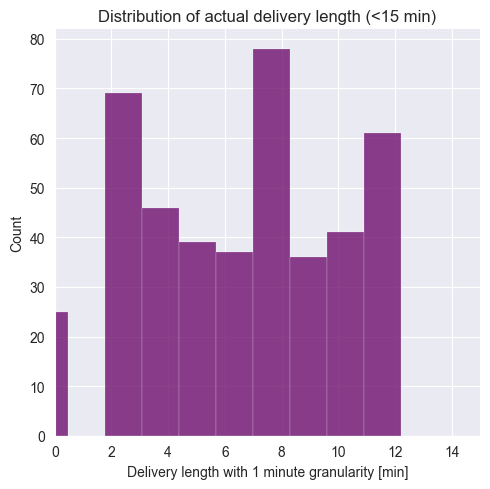

In [722]:
plt.figure(figsize=(8, 5), dpi=200)
sns.displot(
    data=drive_segments, x="delivery_length_rounded", color='#660066', 
)
plt.title("Distribution of actual delivery length (<15 min)")
plt.xlabel("Delivery length with 1 minute granularity [min]")
plt.xlim((0,15))
plt.tight_layout()
plt.savefig("charts\\distribution_of_actual delivery_length_left_part.png");  # only left part of the upper histogram is show - only for orders whose delivery length is less than 15 minutes (most of them)

In [723]:
orders = pd.read_csv("DATA\\orders.csv")

In [724]:
delivered_orders = pd.merge(drive_segments, orders, on='order_id')  # df which contains all orders that have defined planned delivery duration and actual delivery duration

In [725]:
delivered_orders["delivery_length_in_seconds"] = delivered_orders['delivery_length'].apply(lambda x: int(round(x*60)))

In [726]:
delivered_orders["error"] = delivered_orders["planned_delivery_duration"] -delivered_orders["delivery_length_in_seconds"]

C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\natal\AppData\Local\Temp\ipykernel_11068\314797825.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 3400x1000 with 0 Axes>

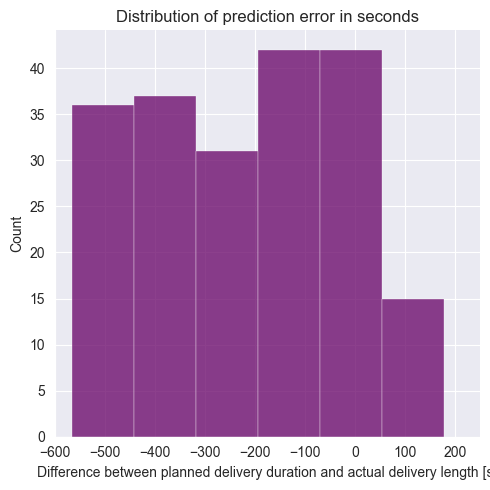

In [727]:
plt.figure(figsize=(17, 5), dpi=200)
sns.displot(
    data=delivered_orders, x="error", color='#660066'
)
plt.title("Distribution of prediction error in seconds")
plt.xlabel("Difference between planned delivery duration and actual delivery length [s]")
plt.tight_layout()
plt.xlim((-600,250))
plt.savefig("charts\\distribution_of_prediction_error_in_seconds");  # prediction error in seconds displayed

In [728]:
delivered_orders["error_percentage"] = (np.abs(delivered_orders["error"]) / delivered_orders["delivery_length_in_seconds"])*100

In [729]:
delivered_orders

,segment_type,order_id,segment_start_time,segment_end_time,delivery_length,delivery_length_rounded,customer_id,sector_id,planned_delivery_duration,delivery_length_in_seconds,error,error_percentage
0,DRIVE,331,2024-02-26 06:54:47,2024-02-26 07:00:21,5.566667,6,272,3,178,334,-156,46.706587
1,DRIVE,355,2024-02-18 21:04:48,2024-02-18 21:15:21,10.550000,11,316,2,175,633,-458,72.353870
2,DRIVE,265,2024-02-07 08:12:03,2024-02-07 08:19:27,7.400000,7,251,3,180,444,-264,59.459459
3,DRIVE,809,2024-02-26 09:20:27,2024-02-26 09:25:53,5.433333,5,270,2,178,326,-148,45.398773
4,DRIVE,351,2024-02-13 03:00:11,2024-02-13 03:02:59,2.800000,3,176,2,175,168,7,4.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
200,DRIVE,20,2024-02-25 20:58:36,2024-02-25 21:03:48,5.200000,5,10,1,178,312,-134,42.948718
201,DRIVE,604,2024-02-12 14:31:16,2024-02-12 14:31:16,0.000000,0,242,2,176,0,176,inf
202,DRIVE,224,2024-02-12 08:08:54,2024-02-12 08:08:54,0.000000,0,284,3,176,0,176,inf
203,DRIVE,198,2024-02-08 09:15:51,2024-02-08 09:26:57,11.100000,11,131,3,177,666,-489,73.423423


C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\natal\AppData\Local\Temp\ipykernel_11068\3517266806.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 3400x1000 with 0 Axes>

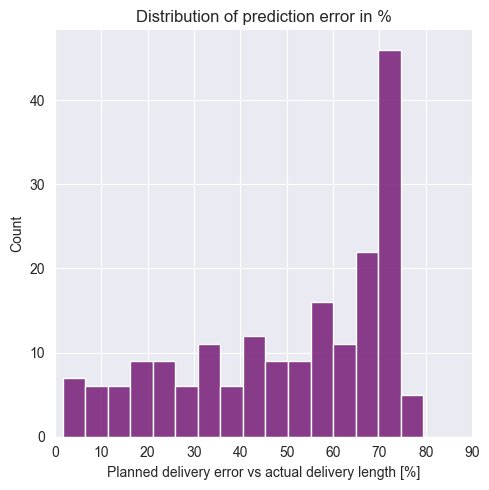

In [743]:
plt.figure(figsize=(17, 5), dpi=200)
sns.displot(
    data=delivered_orders, x="error_percentage", color='#660066', bins=20
)
plt.title("Distribution of prediction error in %")
plt.xlabel("Planned delivery error vs actual delivery length [%]")
plt.xlim((0,90))
plt.tight_layout()
plt.savefig("charts\\distribution_of_prediction_error_in_percents");  # prediction error in % displayed

In [731]:
delivered_orders[delivered_orders["error"] < -1000]

,segment_type,order_id,segment_start_time,segment_end_time,delivery_length,delivery_length_rounded,customer_id,sector_id,planned_delivery_duration,delivery_length_in_seconds,error,error_percentage
66,DRIVE,322,2024-02-20 07:53:22,2024-02-20 12:03:41,250.316667,250,256,2,178,15019,-14841,98.814835
178,DRIVE,410,2024-02-20 02:33:32,2024-02-20 06:41:19,247.783333,248,260,2,178,14867,-14689,98.802717


In [732]:
delivered_orders[["sector_id", "delivery_length_in_seconds"]]

,sector_id,delivery_length_in_seconds
0,3,334
1,2,633
2,3,444
3,2,326
4,2,168
...,...,...
200,1,312
201,2,0
202,3,0
203,3,666


In [733]:
actual_sector_delivery_durations = delivered_orders.groupby('sector_id')['delivery_length_in_seconds'].mean()

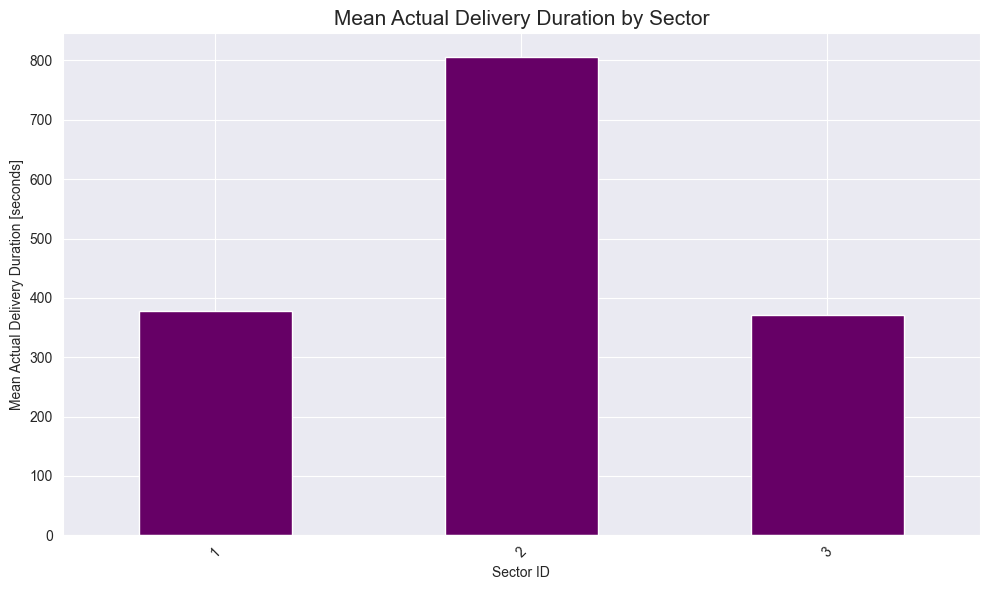

In [742]:
plt.figure(figsize=(10, 6))
actual_sector_delivery_durations.plot(kind='bar', color='#660066')
plt.title('Mean Actual Delivery Duration by Sector', fontsize=15)
plt.xlabel('Sector ID')
plt.ylabel('Mean Actual Delivery Duration [seconds]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts\\mean_actual_delivery_duration_by_sector");  # calculate mean actual delivery duration in sectors 

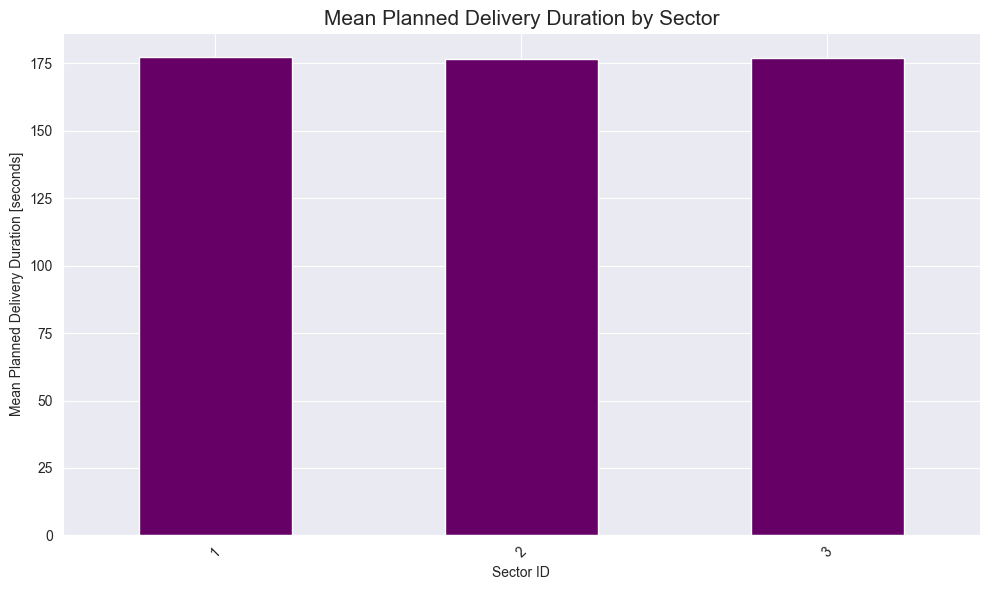

In [740]:
planned_sector_delivery_durations = delivered_orders.groupby('sector_id')['planned_delivery_duration'].mean()

plt.figure(figsize=(10, 6))
planned_sector_delivery_durations.plot(kind='bar', color='#660066')
plt.title('Mean Planned Delivery Duration by Sector', fontsize=15)
plt.xlabel('Sector ID')
plt.ylabel('Mean Planned Delivery Duration [seconds]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts\\mean_planned_delivery_duration_by_sector");  # calculate mean planned delivery duration in sectors 